<a href="https://colab.research.google.com/github/karthik7SRM/DataScienceTeam02/blob/main/Hashtag%20Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set seaborn style
sns.set(style='whitegrid')

In [ ]:
# 2. Load Dataset
df = pd.read_csv("tweets_with_sentiment.csv")
df.head()

,Tweet_ID,Username,Text_cleaned,Retweets,Likes,month,date,time,Followers,Hashtags_cleaned,hashtags1,hashtags2,hashtags3,tokens,Category,Compound_Score,Sentiment
0,1,julie81,party least receive say or single. prevent pre...,2,25,Jan,30-01-2023,11:00:51,60,"party, least, receive",party,least,receive,"['party', 'receive', 'single', 'prevent', 'pre...",finance,0.8885,Positive
1,2,richardhester,hotel still congress may member staff. media d...,35,29,Jan,02-01-2023,22:45:58,84,"hotel, still, congress",hotel,still,congress,"['hotel', 'congress', 'member', 'staff', 'medi...",politics,0.2960,Positive
2,3,williamsjoseph,nice be her debate industry that year. film wh...,51,25,Jan,18-01-2023,11:25:19,89,"nice, debate, industry",nice,debate,industry,"['nice', 'debate', 'industry', 'year', 'film',...",cinema,0.8481,Positive
3,4,danielsmary,laugh explain situation career occur serious. ...,37,18,Apr,10-04-2023,22:06:29,76,"laugh, explain, situation",laugh,explain,situation,"['laugh', 'explain', 'situation', 'career', 'o...",technology,0.6249,Positive
4,5,carlwarren,involve sense former often approach government...,27,80,Jan,24-01-2023,07:12:21,115,"involve, sense, former",involve,sense,former,"['involve', 'sense', 'approach', 'government',...",technology,0.6705,Positive


In [ ]:
# 3. Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
df['date']

,date
0,2023-01-30
1,2023-01-02
2,2023-01-18
3,2023-04-10
4,2023-01-24
...,...
9995,2023-01-15
9996,2023-05-06
9997,2023-02-27
9998,2023-01-09


In [ ]:
# 4. Average Compound Sentiment Score per Day
daily_sentiment = df.groupby('date')['Compound_Score'].mean().reset_index()
daily_sentiment

,date,Compound_Score
0,2023-01-01,0.443490
1,2023-01-02,0.402300
2,2023-01-03,0.462758
3,2023-01-04,0.556219
4,2023-01-05,0.420517
...,...,...
130,2023-05-11,0.478773
131,2023-05-12,0.436199
132,2023-05-13,0.505376
133,2023-05-14,0.466171


In [ ]:
# 5. Tweet Count & Sentiment by Week or Month
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sentiment = df.groupby('week')['Compound_Score'].mean().reset_index()
weekly_sentiment


,week,Compound_Score
0,2022-12-26,0.443490
1,2023-01-02,0.436042
2,2023-01-09,0.443939
3,2023-01-16,0.405255
4,2023-01-23,0.498925
5,2023-01-30,0.430332
6,2023-02-06,0.450761
7,2023-02-13,0.452761
8,2023-02-20,0.470551
9,2023-02-27,0.450438


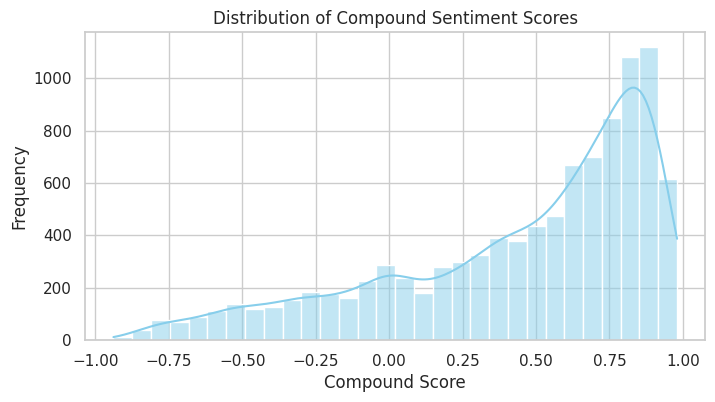

In [ ]:
# Plot 1 : Distribution of Sentiment Scores
plt.figure(figsize=(8, 4))
sns.histplot(df['Compound_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# 6. Most Active Users or Influencers
top_users = df.groupby('Username')['Followers'].mean().sort_values(ascending=False).head(10)
top_users


,Followers
Username,
brandihernandez,150.0
robert17,150.0
whitemark,149.0
ernest53,149.0
kellysuarez,149.0
gwalsh,149.0
qbanks,149.0
josephjones,149.0
acostajesse,149.0


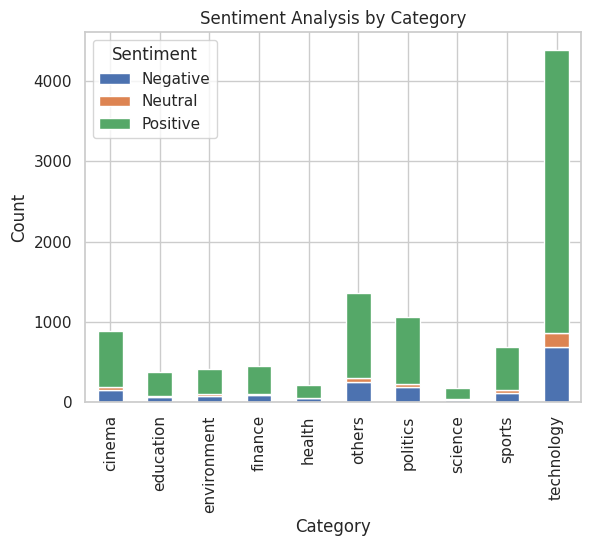

In [ ]:
# Plot 2 : Sentiment by Category
sentiment_by_cat = df.groupby(['Category', 'Sentiment']).size().unstack().fillna(0)
sentiment_by_cat.plot(kind='bar', stacked=True)
plt.title('Sentiment Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


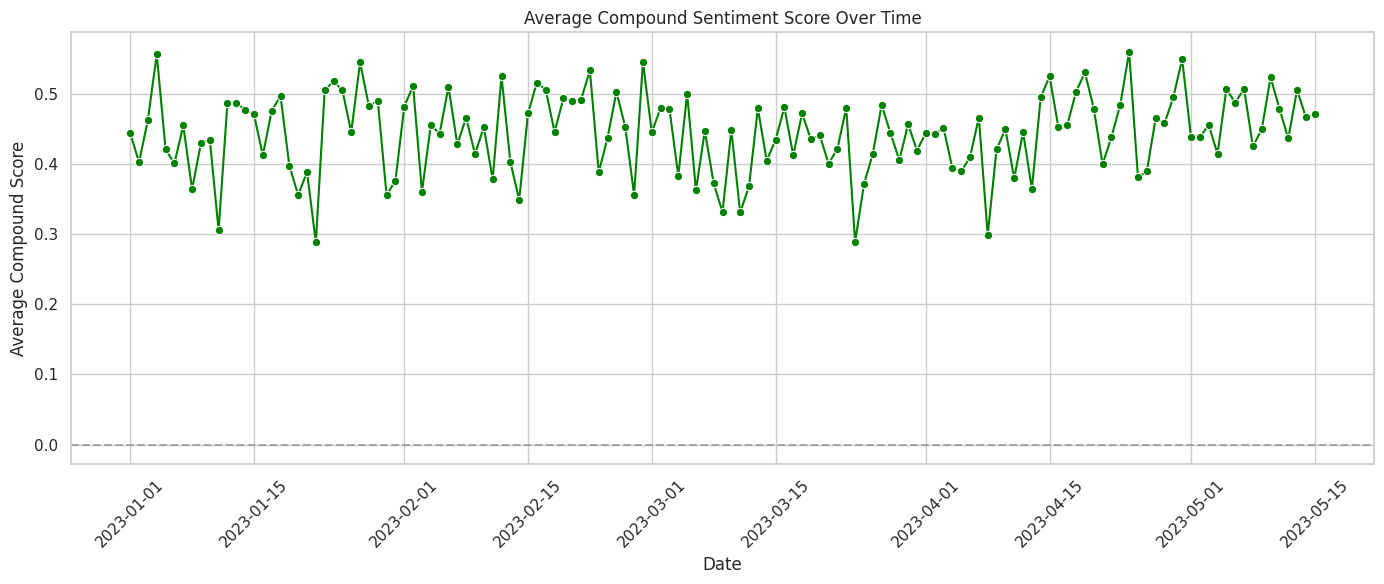

In [ ]:
#Plot 3: Compound Sentiment Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sentiment, x='date', y='Compound_Score', marker='o', color='green')
plt.axhline(0, linestyle='--', color='gray', alpha=0.6)
plt.title('Average Compound Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 7. Count of Sentiment Categories per Day
sentiment_counts = df.groupby(['date', 'Sentiment']).size().unstack().fillna(0)
sentiment_counts

Sentiment,Negative,Neutral,Positive
date,,,
2023-01-01,13.0,2.0,52.0
2023-01-02,17.0,1.0,67.0
2023-01-03,11.0,5.0,67.0
2023-01-04,8.0,3.0,63.0
2023-01-05,13.0,2.0,67.0
...,...,...,...
2023-05-11,12.0,3.0,71.0
2023-05-12,14.0,5.0,66.0
2023-05-13,8.0,1.0,53.0


<Figure size 1400x600 with 0 Axes>

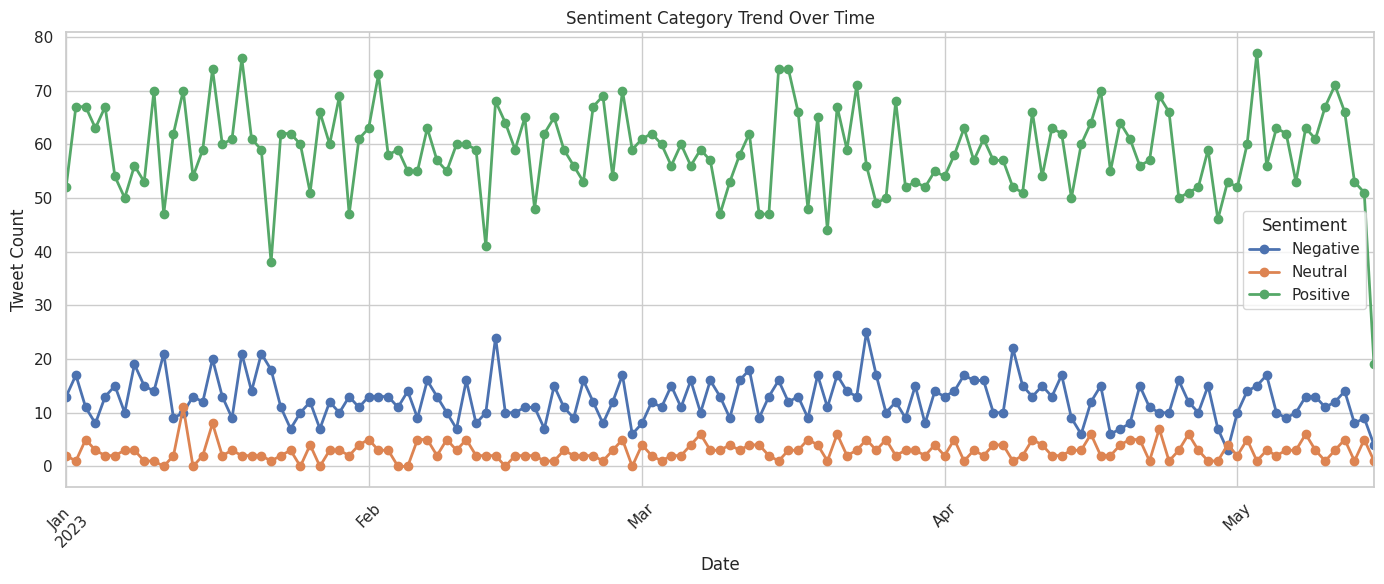

In [ ]:
#Plot 4: Sentiment Categories Count Over Time
plt.figure(figsize=(14, 6))
sentiment_counts.plot(kind='line', marker='o', figsize=(14, 6), linewidth=2)
plt.title('Sentiment Category Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# 8. Hashtag Trend Analysis (Top 20 Hashtags)
from collections import Counter

In [ ]:
# 9. Split and flatten all hashtags
hashtag_series = df['Hashtags_cleaned'].dropna().apply(lambda x: x.split(', '))
all_hashtags = [tag.strip().lower() for sublist in hashtag_series for tag in sublist if tag.strip() != '']

In [ ]:
# 10. Count frequency
hashtag_counts = Counter(all_hashtags)
top_hashtags = hashtag_counts.most_common(20)
top_hashtags


[('visit', 58),
 ('help', 56),
 ('scene', 55),
 ('serve', 54),
 ('culture', 53),
 ('high', 51),
 ('never', 51),
 ('behind', 51),
 ('meeting', 51),
 ('least', 50),
 ('cell', 50),
 ('human', 50),
 ('small', 50),
 ('item', 50),
 ('team', 50),
 ('line', 49),
 ('call', 49),
 ('term', 49),
 ('nearly', 49),
 ('senior', 49)]

In [ ]:
#  11. Convert to DataFrame for plotting
top_hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])
top_hashtags_df

,Hashtag,Count
0,visit,58
1,help,56
2,scene,55
3,serve,54
4,culture,53
5,high,51
6,never,51
7,behind,51
8,meeting,51
9,least,50


/tmp/ipython-input-39-2913800531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hashtags_df, x='Count', y='Hashtag', palette='magma')
/tmp/ipython-input-39-2913800531.py:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


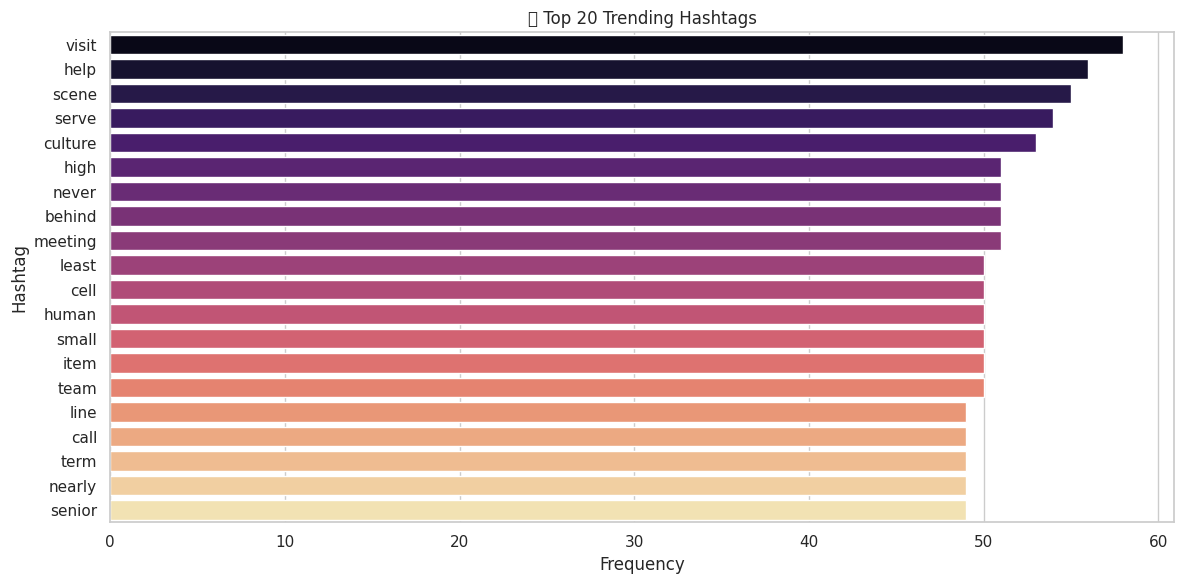

In [ ]:
# Plot 5 : Top 20 Hashtags
plt.figure(figsize=(12, 6))
sns.barplot(data=top_hashtags_df, x='Count', y='Hashtag', palette='magma')
plt.title('🔥 Top 20 Trending Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()
